# Domain walls (new, work in progress)


```{include} live.md
```


In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


In [37]:
# %load glsp.py
# glsp.py: code to solve GL BVP and plot psi and b.

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def nat(h): # natural BC with applied magnetizing field h
  return 0,h

def inf(): # 'infinity' BC with b=da=0 f=1 or 0 at 'infinity'
  return 0,0

def nrm(r,h): # normal metal BC with parameter r.
  return (r,h)

def BC(Y,r,h): # boundary condition (based on two items: r metal parameter,applied field h)
  return [Y[1]-r*Y[0],Y[3]-h]

def glsol(kappa,A,B):
  a,ra,ha=A
  b,rb,hb=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array(BC(Ya,ra,ha)+BC(Yb,rb,hb))
  rng=[a, b]
  X = np.linspace(*rng, nodes)
  Y0=[0 if x<0 else 1 for x in X]
  Y = np.vstack([Y0,np.zeros((3, X.size))])
  return solve_bvp(dY, bc, X, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  if sol.success:
    x_plot = np.linspace(A[0],B[0], 100)
    y_plot = sol.sol(x_plot)[0] # f
    plt.plot(x_plot, y_plot,label=f"$\psi: {tex}$")
    y_plot = sol.sol(x_plot)[3] # b=da
    plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
    return True
  raise ValueError(sol.message)

## Plots with varying $\kappa$

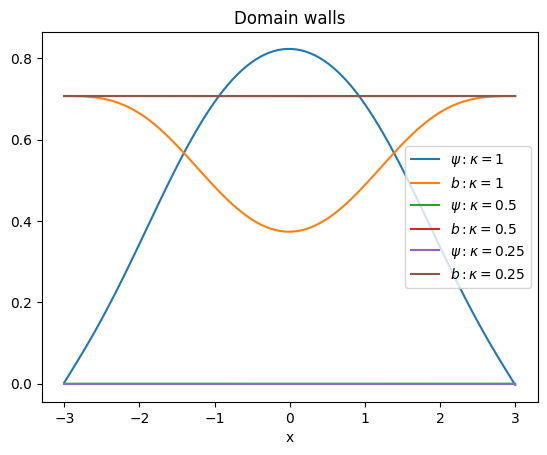

In [43]:
kappa=1
hc=1/(2**(1/2)) # critical field
a,b=-3,3 # range needs to be adjusted just right for smooth curves (too short) or type-II switching (too long, high-kappa)
A=(a,100,hc)
B=(b,100,hc)
while kappa>1/8:
  glplot(kappa,A,B,f"\kappa={kappa}")
  kappa/=2
plt.xlabel("x")
plt.title(f"Domain walls")
plt.legend()
plt.show()

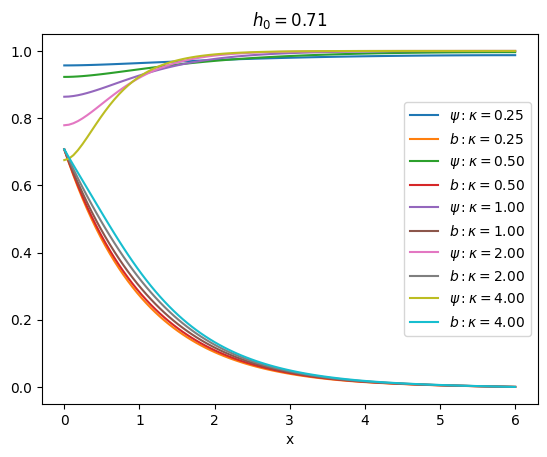

In [39]:
# basic usage vacuum boundary at $x=0$. As published the applied field is critical.

h0=1/2**(1/2)

for k in range(-2,3):
  kappa=2**k
  glplot(kappa,(0,*nat(h0)),(6,*inf()),f"\kappa={kappa:.2f}")
plt.xlabel("x")
plt.title(f"$h_0={h0:.2f}$")
plt.legend()
plt.show()

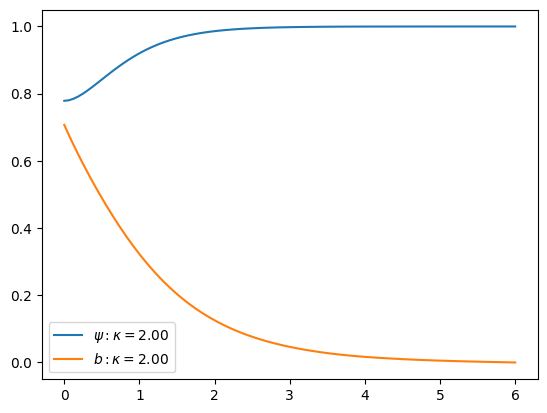

In [40]:
h0=1/2**(1/2)
kappa=2
glplot(kappa,(0,*nat(h0)),(6,*inf()),f"\kappa={kappa:.2f}")
plt.legend()